# PREDICTION OF Revenue and Genre

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',3998)

import warnings
warnings.filterwarnings('ignore')

## Reading The Data

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
df.drop(['id','original_title','title','status','homepage','tagline','overview'],axis=1,inplace=True)
#Dropped the columns which are unnecessary.

In [5]:
df.shape

(4803, 13)

## Checking Null Values

In [6]:
df.isnull().sum()

budget                  0
genres                  0
keywords                0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
vote_average            0
vote_count              0
dtype: int64

## Checking Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 13 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
keywords                4803 non-null object
original_language       4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
dtypes: float64(3), int64(3), object(7)
memory usage: 487.9+ KB


## Converting Float Type to Int Type

In [8]:
df['popularity']=df['popularity'].astype('int64')

## Release Date Splitting

In [9]:
data_a = df['release_date'].str.split('-',0,expand=True)
df['release_date'] = data_a[0]

## Genres Splitting

In [10]:
df['genres'].head(3)

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

In [11]:
data_b = df['genres'].str.split(':',2,expand=True)
data_b.head(3)

,0,1,2
0,"[{""id""","28, ""name""","""Action""}, {""id"": 12, ""name"": ""Adventure""}, {..."
1,"[{""id""","12, ""name""","""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, ..."
2,"[{""id""","28, ""name""","""Action""}, {""id"": 12, ""name"": ""Adventure""}, {..."


In [12]:
data_c = data_b[2].str.split('}',1,expand=True)
data_c.head(3)

,0,1
0,"""Action""",", {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ..."
1,"""Adventure""",", {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""n..."
2,"""Action""",", {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ..."


In [13]:
data_d = data_c[0].str.split('"',1,expand=True)
data_d.head(3)

,0,1
0,,"Action"""
1,,"Adventure"""
2,,"Action"""


In [14]:
data_f = data_d[1].str.split('"',0,expand=True)
data_f.head(3)

,0,1
0,Action,
1,Adventure,
2,Action,


In [15]:
data_f[0].value_counts()

Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: 0, dtype: int64

In [16]:
df['genres'] = data_f[0]

In [17]:
df.head()

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,237000000,Action,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800
1,300000000,Adventure,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500
2,245000000,Action,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466
3,250000000,Action,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,112,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106
4,260000000,Action,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,43,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124


## Keywords Splitting

In [18]:
df['keywords'].head(3)

0    [{"id": 1463, "name": "culture clash"}, {"id":...
1    [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2    [{"id": 470, "name": "spy"}, {"id": 818, "name...
Name: keywords, dtype: object

In [19]:
data_g = df['keywords'].str.split(':',2,expand=True)
data_g.head(3)

,0,1,2
0,"[{""id""","1463, ""name""","""culture clash""}, {""id"": 2964, ""name"": ""futur..."
1,"[{""id""","270, ""name""","""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, ..."
2,"[{""id""","470, ""name""","""spy""}, {""id"": 818, ""name"": ""based on novel""}..."


In [20]:
data_h = data_g[2].str.split('}',1,expand=True)
data_h.head(3)

,0,1
0,"""culture clash""",", {""id"": 2964, ""name"": ""future""}, {""id"": 3386,..."
1,"""ocean""",", {""id"": 726, ""name"": ""drug abuse""}, {""id"": 91..."
2,"""spy""",", {""id"": 818, ""name"": ""based on novel""}, {""id""..."


In [21]:
data_i = data_h[0].str.split('"',1,expand=True)
data_i.head(3)

,0,1
0,,"culture clash"""
1,,"ocean"""
2,,"spy"""


In [22]:
data_j = data_i[1].str.split('"',0,expand=True)
data_j.head(3)

,0,1
0,culture clash,
1,ocean,
2,spy,


In [23]:
data_j[0].value_counts().head(10)

based on novel             94
independent film           87
new york                   73
london england             61
prison                     60
suicide                    48
paris                      44
woman director             43
sex                        42
father son relationship    39
Name: 0, dtype: int64

In [24]:
df['keywords'] = data_j[0]

In [25]:
df['keywords'].mode()

0    based on novel
dtype: object

## Production Companies Splitting

In [26]:
df['production_companies'].value_counts().head(3)

[]                                            351
[{"name": "Paramount Pictures", "id": 4}]      58
[{"name": "Universal Pictures", "id": 33}]     45
Name: production_companies, dtype: int64

In [27]:
data_k = df['production_companies'].str.split(':',1,expand=True)
data_k.head(3)

,0,1
0,"[{""name""","""Ingenious Film Partners"", ""id"": 289}, {""name..."
1,"[{""name""","""Walt Disney Pictures"", ""id"": 2}, {""name"": ""J..."
2,"[{""name""","""Columbia Pictures"", ""id"": 5}, {""name"": ""Danj..."


In [28]:
data_l = data_k[1].str.split('"',1,expand=True)
data_l.head(3)

,0,1
0,,"Ingenious Film Partners"", ""id"": 289}, {""name"":..."
1,,"Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jer..."
2,,"Columbia Pictures"", ""id"": 5}, {""name"": ""Danjaq..."


In [29]:
data_m = data_l[1].str.split('"',1,expand=True)
data_m.head(3)

,0,1
0,Ingenious Film Partners,", ""id"": 289}, {""name"": ""Twentieth Century Fox ..."
1,Walt Disney Pictures,", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films""..."
2,Columbia Pictures,", ""id"": 5}, {""name"": ""Danjaq"", ""id"": 10761}, {..."


In [30]:
data_m[0].value_counts().head(3)

Paramount Pictures    281
Universal Pictures    260
Columbia Pictures     200
Name: 0, dtype: int64

In [31]:
df['production_companies'] = data_m[0]

## Production Countries Splitting

In [32]:
df['production_countries'].head(3)

0    [{"iso_3166_1": "US", "name": "United States o...
1    [{"iso_3166_1": "US", "name": "United States o...
2    [{"iso_3166_1": "GB", "name": "United Kingdom"...
Name: production_countries, dtype: object

In [33]:
data_n = df['production_countries'].str.split('"',3,expand=True)
data_n.head(3)

,0,1,2,3
0,[{,iso_3166_1,:,"US"", ""name"": ""United States of America""}, {""is..."
1,[{,iso_3166_1,:,"US"", ""name"": ""United States of America""}]"
2,[{,iso_3166_1,:,"GB"", ""name"": ""United Kingdom""}, {""iso_3166_1"":..."


In [34]:
data_o = data_n[3].str.split('"',1,expand=True)
data_o.head(3)

,0,1
0,US,", ""name"": ""United States of America""}, {""iso_3..."
1,US,", ""name"": ""United States of America""}]"
2,GB,", ""name"": ""United Kingdom""}, {""iso_3166_1"": ""U..."


In [35]:
df['production_countries'] = data_o[0]

## Spoken Languages Splitting

In [36]:
df['spoken_languages'].head(3)

0    [{"iso_639_1": "en", "name": "English"}, {"iso...
1             [{"iso_639_1": "en", "name": "English"}]
2    [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...
Name: spoken_languages, dtype: object

In [37]:
data_p = df['spoken_languages'].str.split('"',3,expand=True)
data_p.head(3)

,0,1,2,3
0,[{,iso_639_1,:,"en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""..."
1,[{,iso_639_1,:,"en"", ""name"": ""English""}]"
2,[{,iso_639_1,:,"fr"", ""name"": ""Fran\u00e7ais""}, {""iso_639_1"": ""..."


In [38]:
data_q = data_p[3].str.split('"',1,expand=True)
data_q.head(3)

,0,1
0,en,", ""name"": ""English""}, {""iso_639_1"": ""es"", ""nam..."
1,en,", ""name"": ""English""}]"
2,fr,", ""name"": ""Fran\u00e7ais""}, {""iso_639_1"": ""en""..."


In [39]:
df['spoken_languages'] = data_q[0]

In [40]:
df.head()

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,237000000,Action,culture clash,en,150,Ingenious Film Partners,US,2009,2787965087,162.0,en,7.2,11800
1,300000000,Adventure,ocean,en,139,Walt Disney Pictures,US,2007,961000000,169.0,en,6.9,4500
2,245000000,Action,spy,en,107,Columbia Pictures,GB,2015,880674609,148.0,fr,6.3,4466
3,250000000,Action,dc comics,en,112,Legendary Pictures,US,2012,1084939099,165.0,en,7.6,9106
4,260000000,Action,based on novel,en,43,Walt Disney Pictures,US,2012,284139100,132.0,en,6.1,2124


In [41]:
df.isnull().sum()

budget                    0
genres                   28
keywords                412
original_language         0
popularity                0
production_companies    351
production_countries    174
release_date              1
revenue                   0
runtime                   2
spoken_languages         86
vote_average              0
vote_count                0
dtype: int64

In [42]:
df.dropna(inplace=True)
df['runtime'] = df['runtime'].astype('int64')
df['release_date'] = df['release_date'].astype('int64')

In [43]:
df.shape

(4162, 13)

In [44]:
1-4162/4803

0.13345825525713095

### 13.3% data is missed,we can neglect that one

In [45]:
df.head()

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,237000000,Action,culture clash,en,150,Ingenious Film Partners,US,2009,2787965087,162,en,7.2,11800
1,300000000,Adventure,ocean,en,139,Walt Disney Pictures,US,2007,961000000,169,en,6.9,4500
2,245000000,Action,spy,en,107,Columbia Pictures,GB,2015,880674609,148,fr,6.3,4466
3,250000000,Action,dc comics,en,112,Legendary Pictures,US,2012,1084939099,165,en,7.6,9106
4,260000000,Action,based on novel,en,43,Walt Disney Pictures,US,2012,284139100,132,en,6.1,2124


# Now our Data is Cleaned

In [46]:
for i in df.select_dtypes('object').columns:
    print( "---- %s ---" % i)
    print(df[i].value_counts().head(3))

---- genres ---
Drama     1019
Comedy     883
Action     685
Name: genres, dtype: int64
---- keywords ---
based on novel    93
new york          72
london england    61
Name: keywords, dtype: int64
---- original_language ---
en    3927
fr      56
es      27
Name: original_language, dtype: int64
---- production_companies ---
Paramount Pictures    274
Universal Pictures    252
Columbia Pictures     197
Name: production_companies, dtype: int64
---- production_countries ---
US    2796
GB     342
CA     196
Name: production_countries, dtype: int64
---- spoken_languages ---
en    3628
fr      96
es      74
Name: spoken_languages, dtype: int64


# Univariate Analysis

In [47]:
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'vote_average', 'vote_count'],
      dtype='object')

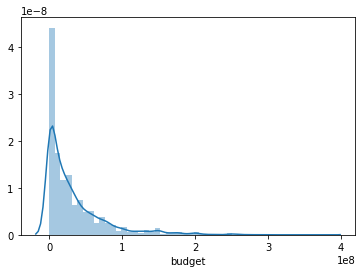

In [48]:
sns.distplot(df['budget'])

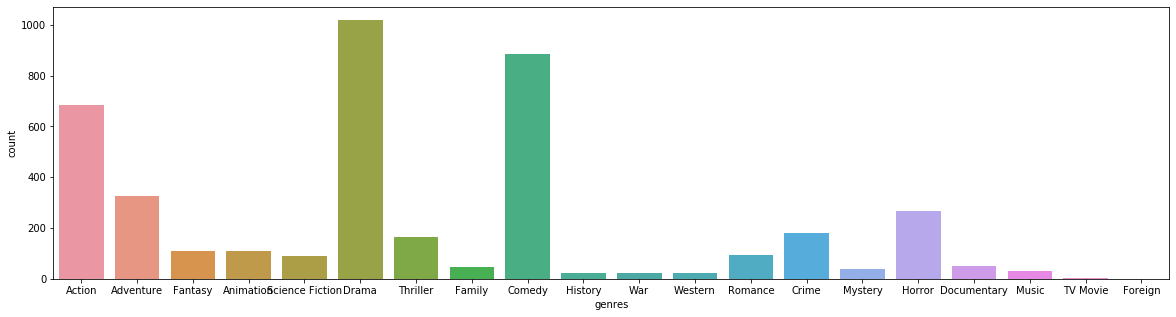

In [49]:
plt.figure(figsize=(20,5))
sns.countplot(df['genres'])

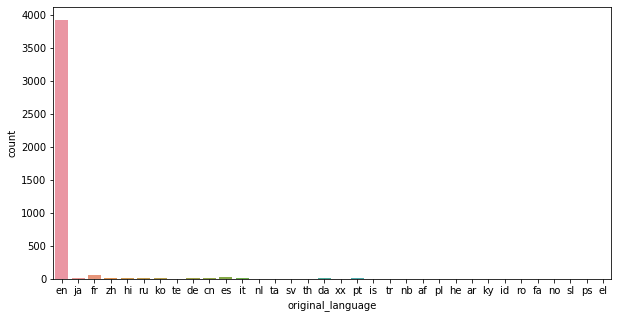

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(df['original_language'])

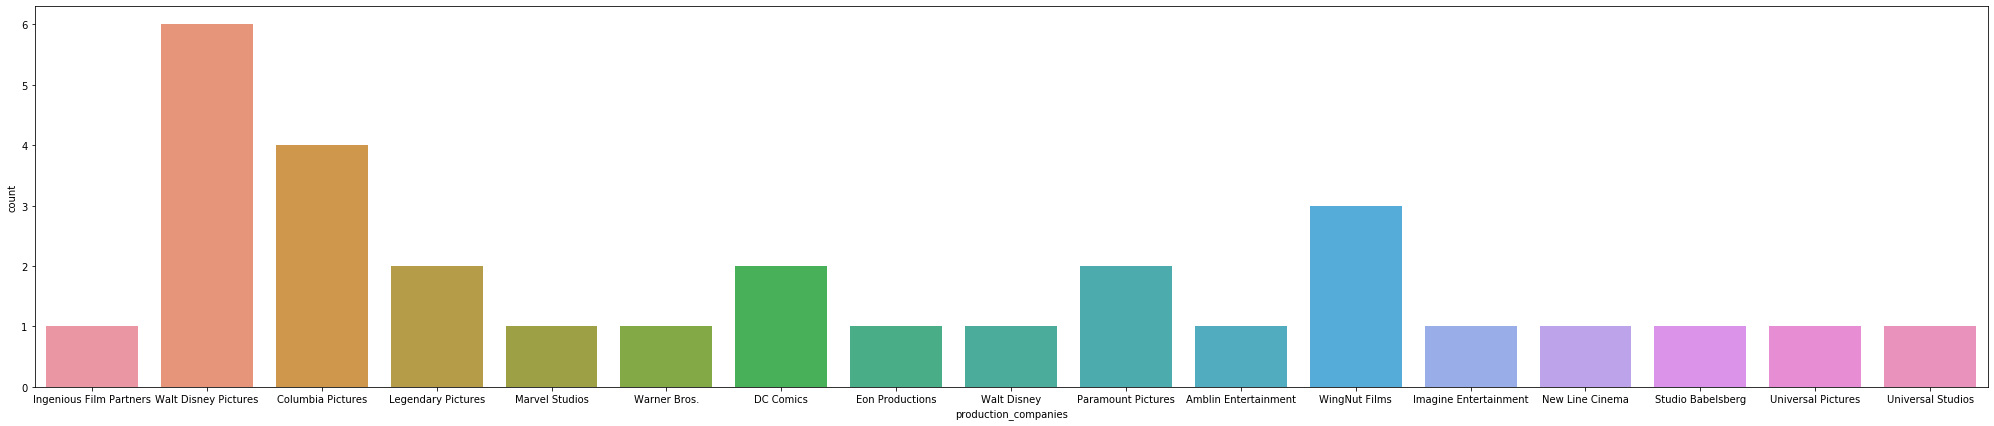

In [51]:
plt.figure(figsize=(35,7))
sns.countplot(df['production_companies'].head(30))

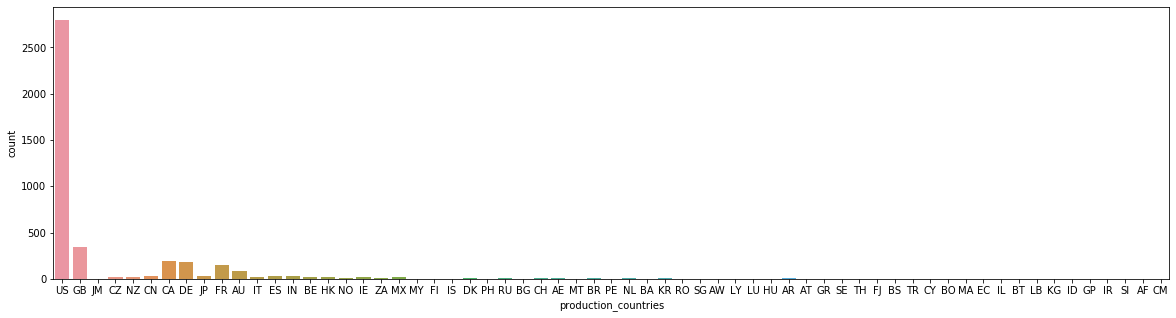

In [52]:
plt.figure(figsize=(20,5))
sns.countplot(df['production_countries'])

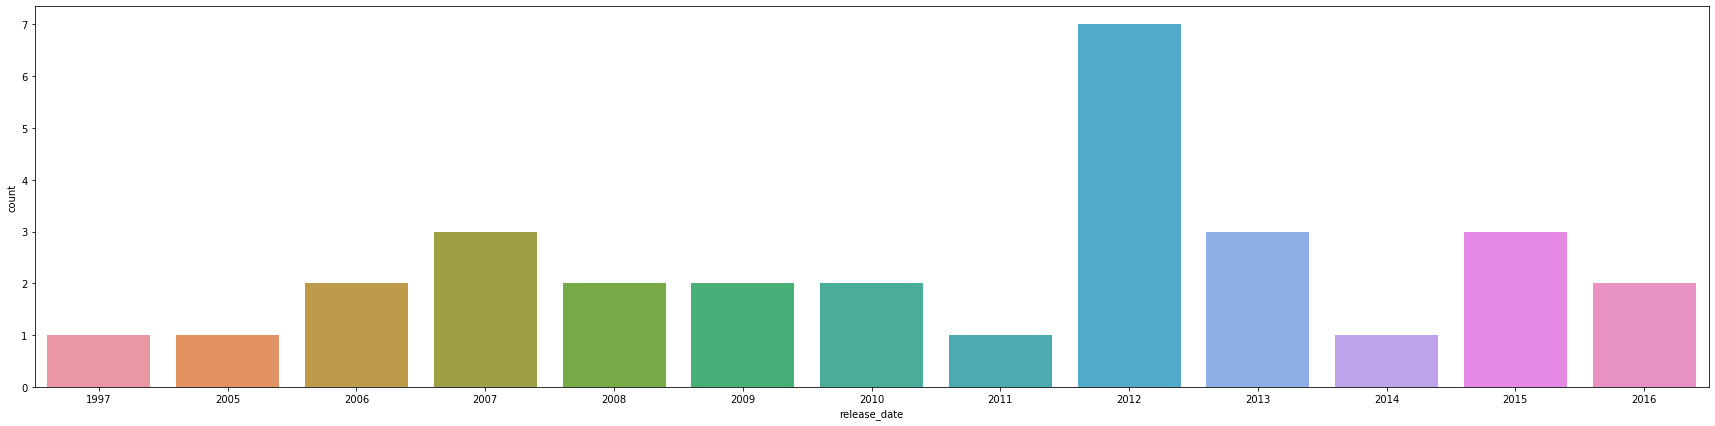

In [53]:
plt.figure(figsize=(30,7))
sns.countplot(df['release_date'].head(30))

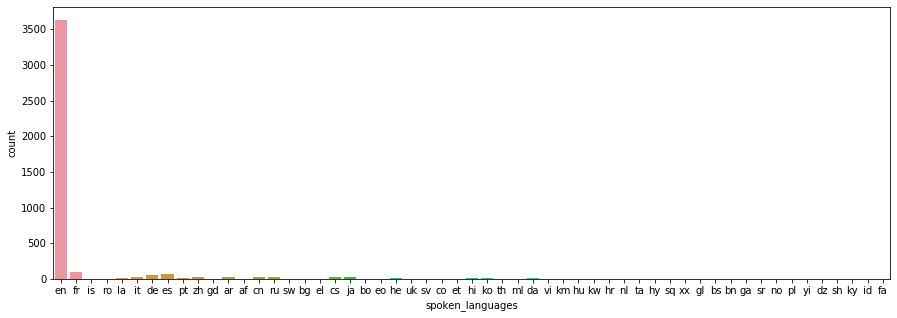

In [54]:
plt.figure(figsize=(15,5))
sns.countplot(df['spoken_languages'])

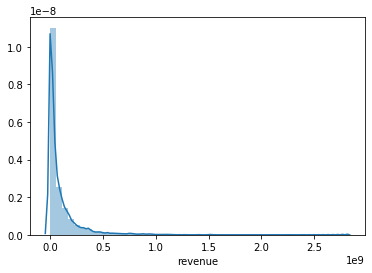

In [55]:
sns.distplot(df['revenue'])

# Bivariate Analysis

In [56]:
df['budget'].groupby(df['genres']).agg('sum')

genres
Action             35309902395
Adventure          21877831736
Animation           8148032353
Comedy             18618699640
Crime               4171235753
Documentary          163595145
Drama              21143931141
Family              2323877800
Fantasy             6017038831
Foreign                 225000
History              608085000
Horror              3436694269
Music                512461360
Mystery              901830000
Romance             2143880100
Science Fiction     4699882003
TV Movie               1000000
Thriller            4656170035
War                  877250000
Western              613923783
Name: budget, dtype: int64

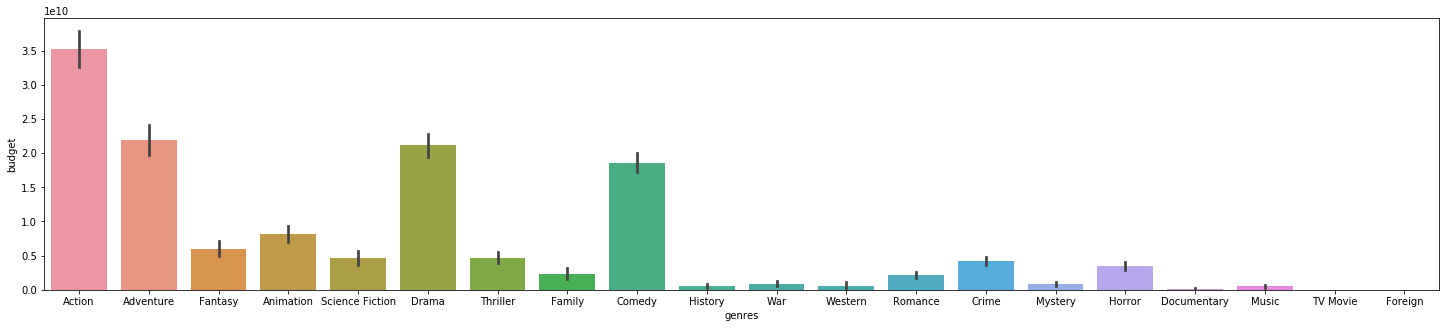

In [57]:
plt.figure(figsize=(25,5))
sns.barplot(df['genres'],df['budget'],estimator=np.sum)

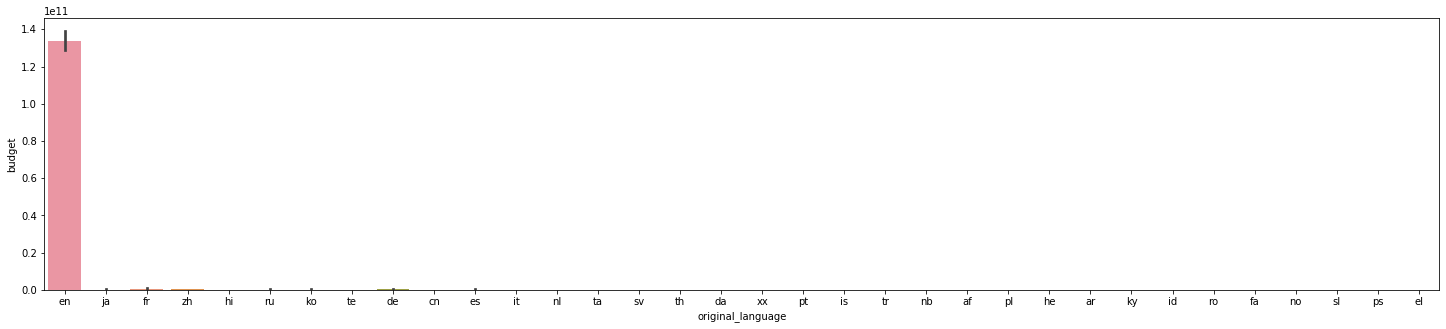

In [58]:
plt.figure(figsize=(25,5))
sns.barplot(df['original_language'],df['budget'],estimator=np.sum)

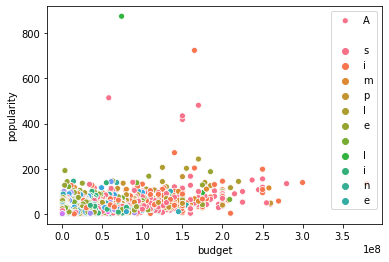

In [59]:
sns.scatterplot(df['budget'],df['popularity'],hue=df['genres'])
plt.legend('A simple line')

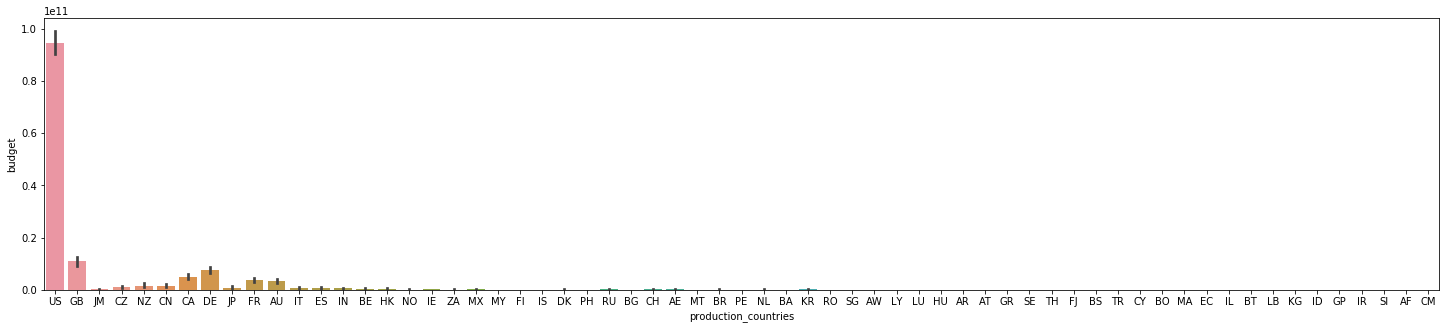

In [60]:
plt.figure(figsize=(25,5))
sns.barplot(df['production_countries'],df['budget'],estimator=np.sum)

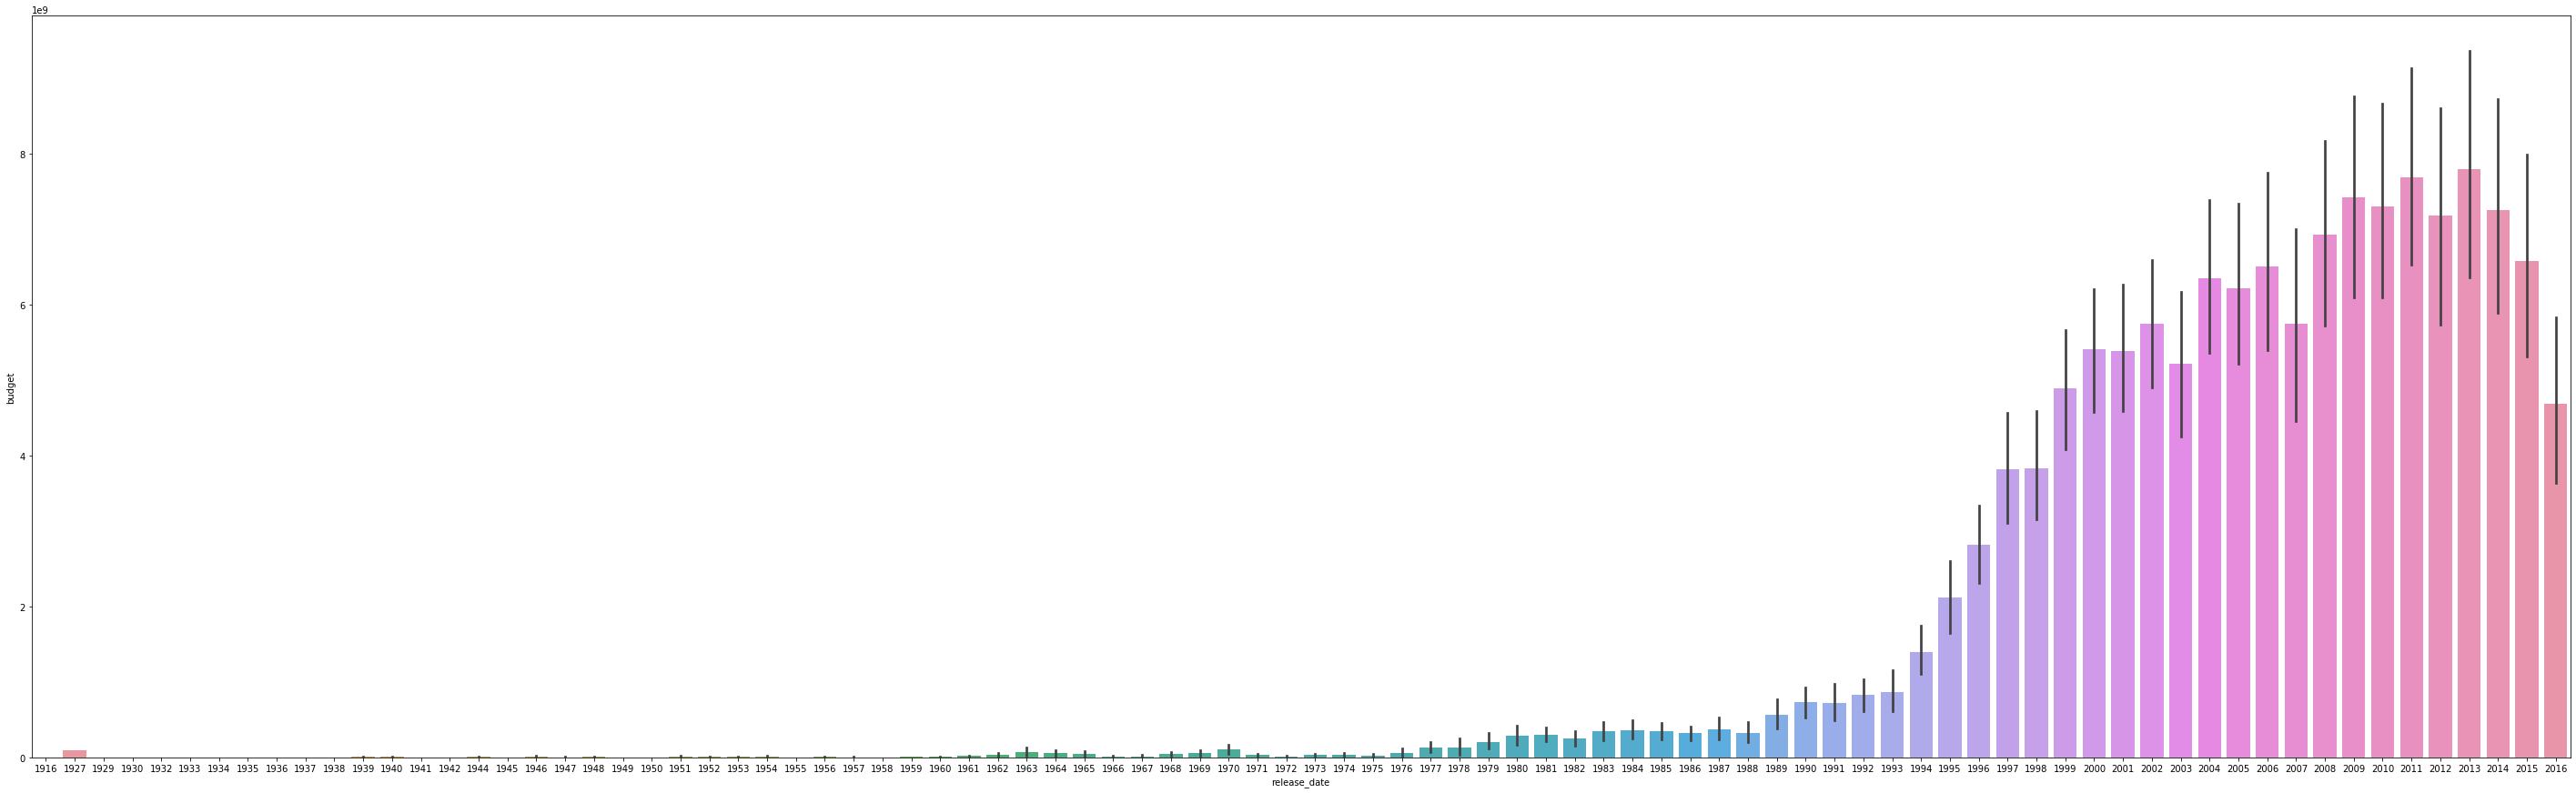

In [61]:
plt.figure(figsize=(50,15))
sns.barplot(df['release_date'],df['budget'],estimator=np.sum)

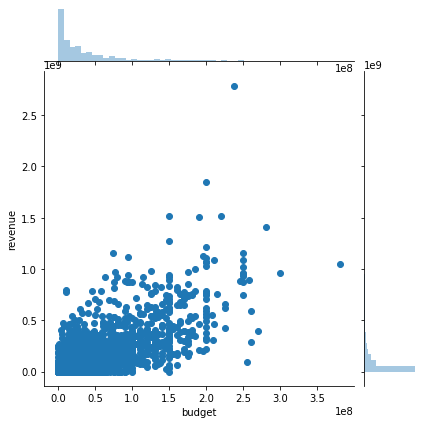

In [62]:
sns.jointplot(df['budget'],df['revenue'])

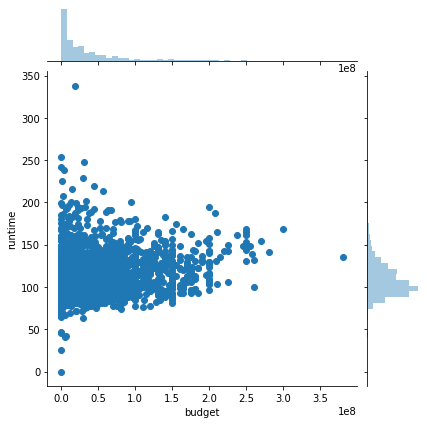

In [63]:
sns.jointplot(df['budget'],df['runtime'])

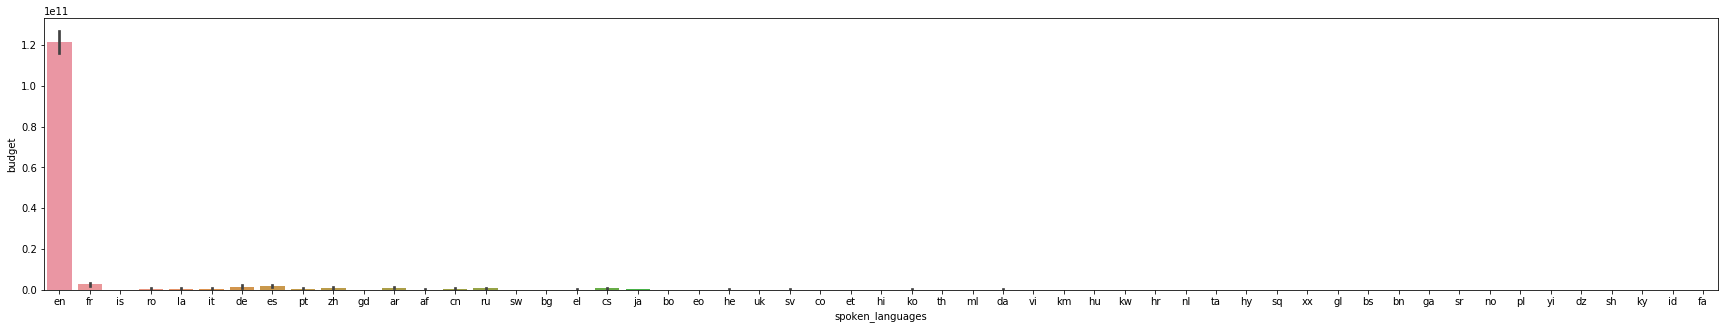

In [64]:
plt.figure(figsize=(30,5))
sns.barplot(df['spoken_languages'],df['budget'],estimator=np.sum)

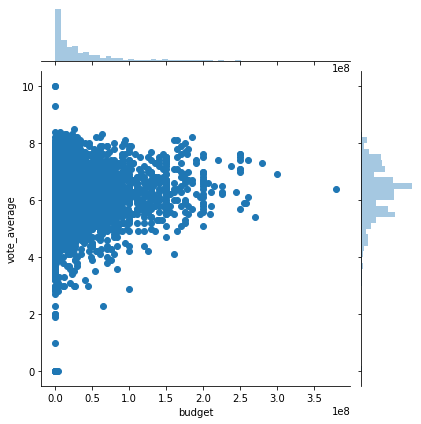

In [65]:
sns.jointplot(df['budget'],df['vote_average'])

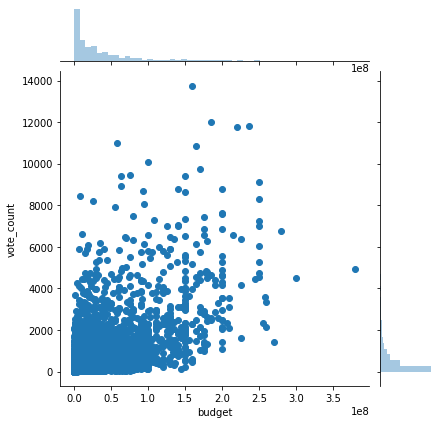

In [66]:
sns.jointplot(df['budget'],df['vote_count'])

<Figure size 1080x720 with 0 Axes>

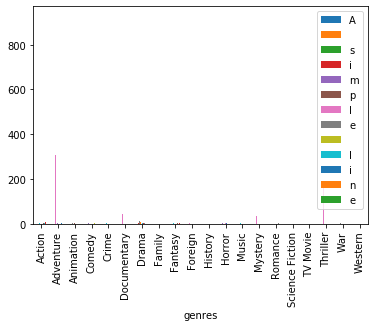

In [67]:
plt.figure(figsize=(15,10))
pd.crosstab(df['genres'],df['original_language']).plot.bar()
plt.legend('A simple line')

<Figure size 1080x720 with 0 Axes>

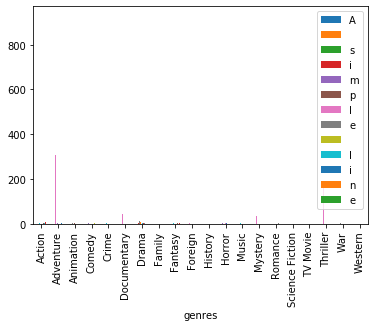

In [68]:
plt.figure(figsize=(15,10))
pd.crosstab(df['genres'],df['original_language']).plot.bar()
plt.legend('A simple line')

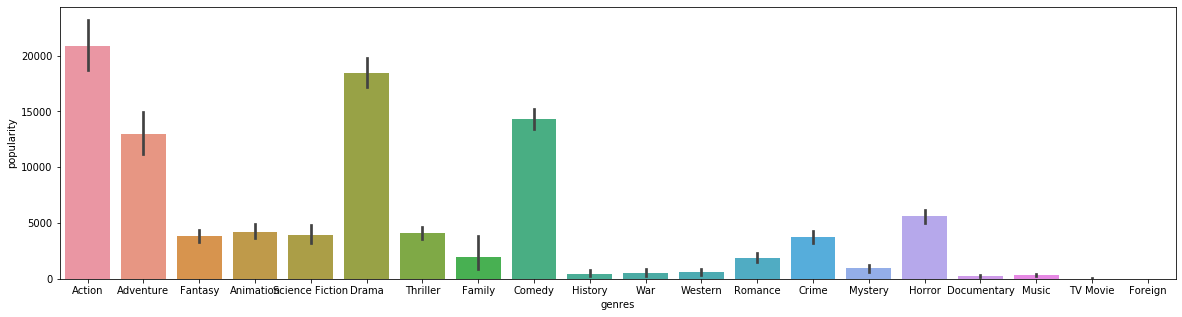

In [69]:
plt.figure(figsize=(20,5))
sns.barplot(df['genres'],df['popularity'],estimator=np.sum)

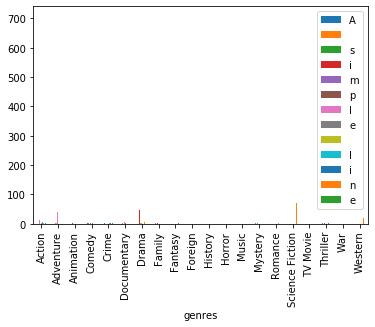

In [70]:
pd.crosstab(df['genres'],df['production_countries']).plot.bar()
plt.legend('A simple line')

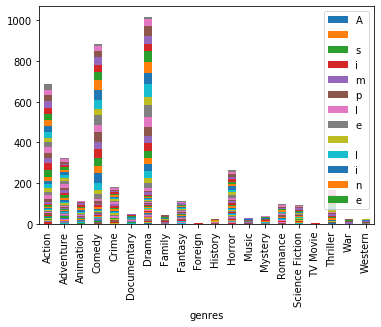

In [71]:
pd.crosstab(df['genres'],df['release_date']).plot.bar(stacked=True)
plt.legend('A simple line')

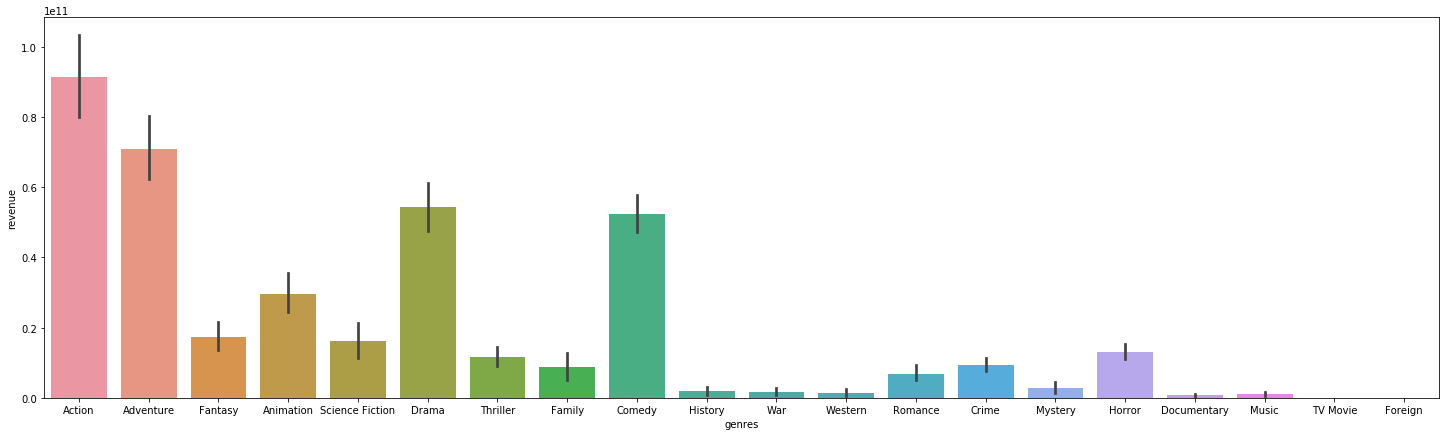

In [72]:
plt.figure(figsize=(25,7))
sns.barplot(df['genres'],df['revenue'],estimator=np.sum)

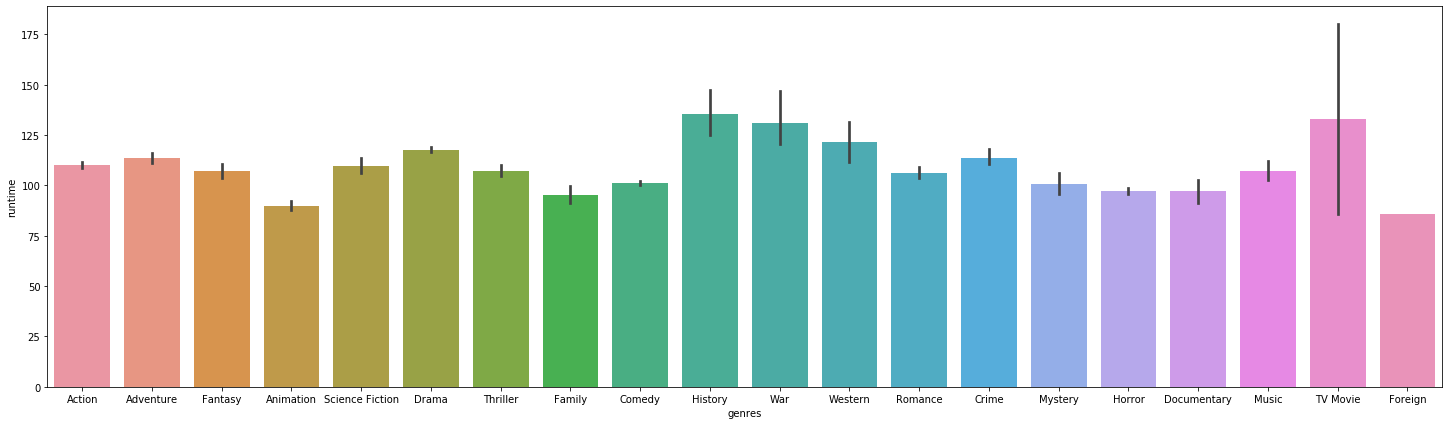

In [73]:
plt.figure(figsize=(25,7))
sns.barplot(df['genres'],df['runtime'],estimator=np.mean)

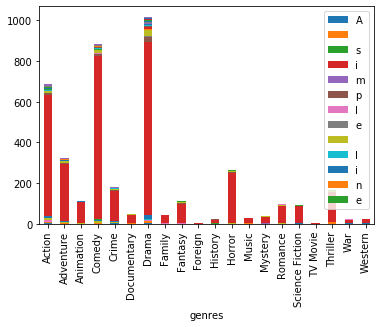

In [74]:
pd.crosstab(df['genres'],df['spoken_languages']).plot.bar(stacked=True)
plt.legend('A simple line')

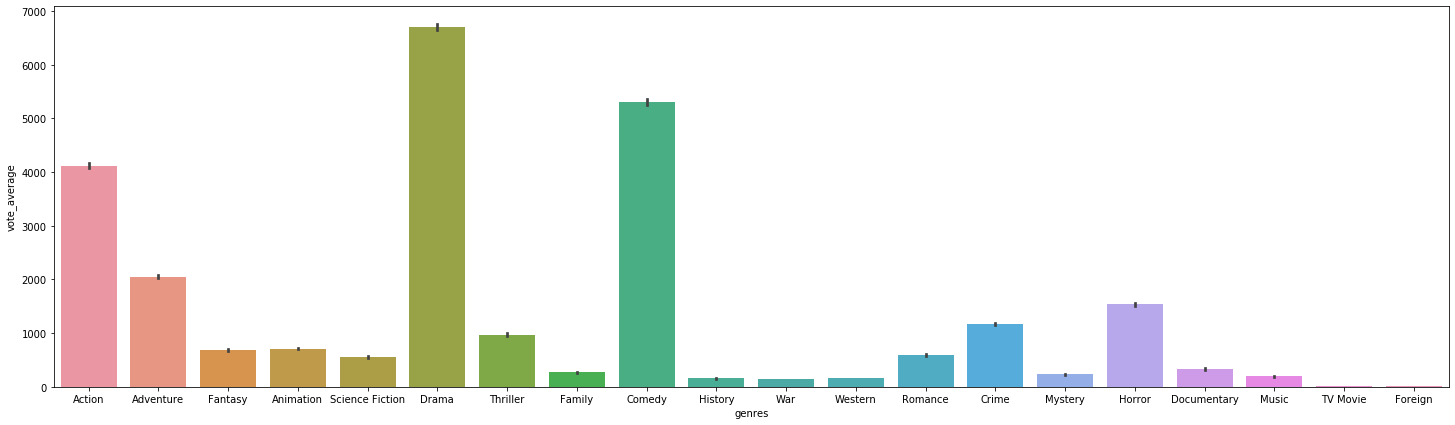

In [75]:
plt.figure(figsize=(25,7))
sns.barplot(df['genres'],df['vote_average'],estimator=np.sum)

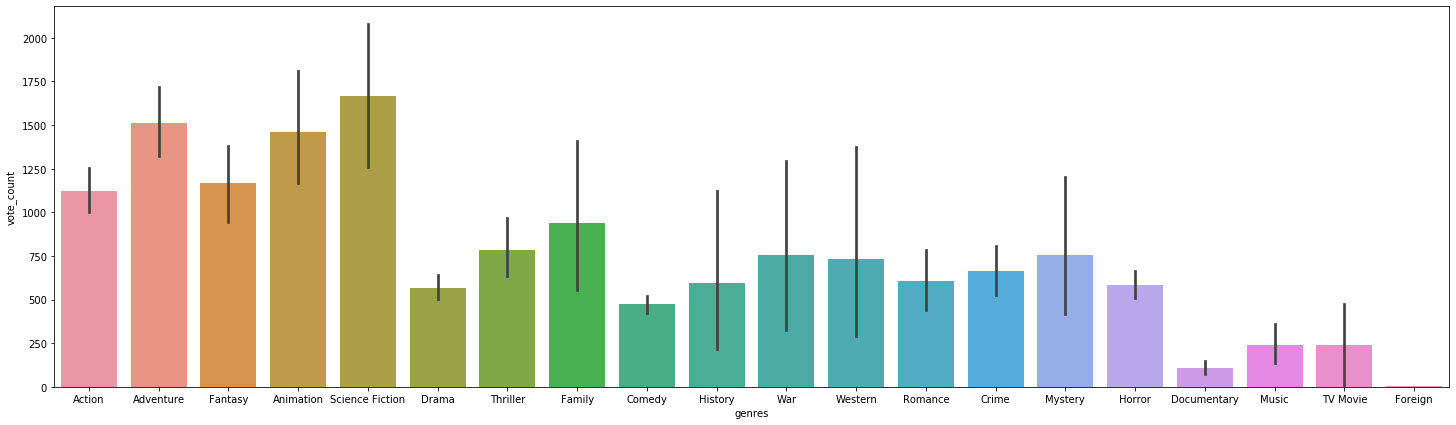

In [76]:
plt.figure(figsize=(25,7))
sns.barplot(df['genres'],df['vote_count'],estimator=np.mean)